# Lab04:  Linear regression 

Courses `MTH00051`: Toán ứng dụng và thống kê
`18CLC6`, `FIT - HCMUS`.
`04/09/2020`

Đây là đồ án cá nhân, do một thành viên thực hiện:

-   `18127231`: Đoàn Đình Toàn (GitHub: [@t3bol90](https://github.com/t3bol90))

In [1]:
## Import thư viện
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mser
from sklearn import preprocessing
from sklearn import model_selection

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./wine.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5,6
1195,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5,6
1196,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5,6
1197,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.625271,0.519133,0.293353,2.564470,0.089266,15.242702,46.884070,0.997059,3.298582,0.665738,10.383069,5.664721
std,1.781795,0.179208,0.196751,1.264441,0.048310,10.210406,33.949177,0.001878,0.156161,0.175921,1.091891,0.809593
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.300000,0.390000,0.120000,1.900000,0.071000,7.000000,21.000000,0.996000,3.195000,0.560000,9.500000,5.000000
50%,8.300000,0.500000,0.290000,2.200000,0.080000,13.000000,38.000000,0.997020,3.300000,0.620000,10.000000,6.000000
75%,9.600000,0.630000,0.450000,2.700000,0.092000,21.000000,63.000000,0.998175,3.390000,0.735000,11.000000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003200,3.900000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1199 non-null   float64
 1   volatile acidity      1199 non-null   float64
 2   citric acid           1199 non-null   float64
 3   residual sugar        1199 non-null   float64
 4   chlorides             1199 non-null   float64
 5   free sulfur dioxide   1199 non-null   float64
 6   total sulfur dioxide  1199 non-null   int64  
 7   density               1199 non-null   float64
 8   pH                    1199 non-null   float64
 9   sulphates             1199 non-null   float64
 10  alcohol               1199 non-null   float64
 11  quality               1199 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 112.5 KB


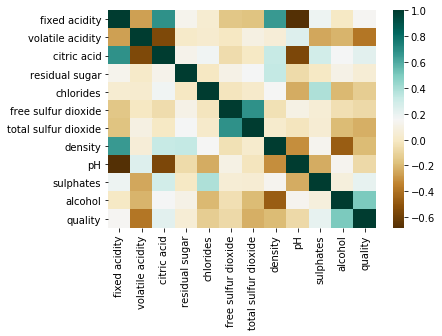

In [5]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap="BrBG")

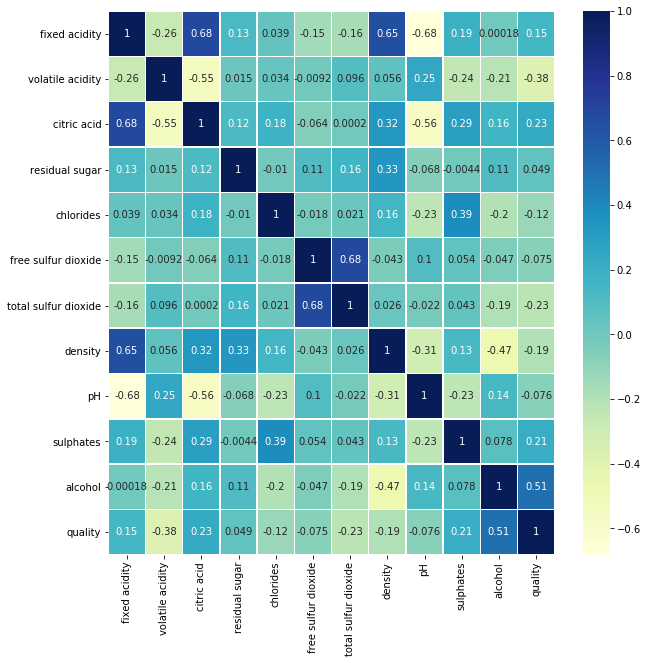

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="YlGnBu", annot=True, linewidths=.5, ax = ax)

## a. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp.

In [7]:
y_label = df.quality
X = df.drop('quality',axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1194,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5
1195,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5
1196,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5
1197,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8


In [8]:
atrain_x,atest_x,atrain_y,atest_y = train_test_split(X,y_label,random_state = 0, stratify = y_label)

In [9]:
models = [('LinearRegression',LinearRegression())]
names = []
for name,model in models:
    model.fit(atrain_x,atrain_y)
    ay_pred = model.predict(atest_x)
    mse = mser(atest_y, ay_pred)
    print("Mean squared error:",mse)
    prediction = pd.DataFrame({'Actual': atest_y, 'Predicted': ay_pred})
    print(prediction.head(25))
    print("Coef: ", model.coef_)

Mean squared error: 0.4146602076820373
      Actual  Predicted
554        5   6.086378
265        7   6.133711
962        5   5.383062
455        8   6.647937
805        7   6.889903
971        6   6.361269
555        5   6.086378
238        6   5.086802
909        6   6.246939
914        6   6.246939
338        6   6.125465
64         5   5.622773
81         5   5.098500
580        5   5.389785
130        5   4.717030
886        6   5.467497
452        6   5.474122
676        6   5.596847
496        6   5.131519
796        5   5.456793
1144       5   5.684587
142        6   7.104504
367        5   5.176109
193        5   5.404825
160        5   5.079523
Coef:  [ 5.93234928e-02 -9.83919685e-01 -3.81793614e-01  3.59341967e-02
 -1.42749101e+00  7.29765238e-04 -2.89452672e-03 -4.06028323e+01
 -1.74537144e-01  7.28102650e-01  3.08498114e-01]


## b. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất. (Gợi ý: Phương pháp Cross Validation)

In [10]:
label = df.columns.values
models = [LinearRegression() for _ in range(len(label))]
cross = []

In [11]:
for name,model in zip(label,models):
    if name == 'quality':
        continue
    X = df[name]
    train_x,test_x,train_y,test_y = train_test_split(X,y_label,random_state = 3)
    train_x= train_x.values.reshape(-1, 1)
    train_y= train_y.values.reshape(-1, 1)
    kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=1)
    cv_results = model_selection.cross_val_score(model, train_x, train_y, cv=kfold, scoring='neg_mean_squared_error')
    error = -1*(cv_results.mean())
    cross.append([name,error])
prediction = pd.DataFrame(sorted(cross),columns=['Feature','Error'])
prediction


,Feature,Error
0,alcohol,0.500657
1,chlorides,0.665687
2,citric acid,0.637686
3,density,0.652420
4,fixed acidity,0.661292
5,free sulfur dioxide,0.668477
6,pH,0.671821
7,residual sugar,0.672908
8,sulphates,0.649935
9,total sulfur dioxide,0.642599


## c. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất.

In [12]:
correlations = df.corr()['quality'].drop('quality')
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [13]:
features = get_features(0.1) 
print(features) 
X = df[features]
y_label

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


0       5
1       5
2       5
3       6
4       5
       ..
1194    6
1195    6
1196    6
1197    6
1198    6
Name: quality, Length: 1199, dtype: int64

In [14]:
# Đoạn P > |t|, ta sẽ tìm các features bằng phương pháp p values với mức tin cậy 0.1.
regressor_OLS = sm.OLS(endog = y_label, exog = X).fit()
regressor_OLS.summary()
# Dễ thấy tất cả đều trong khoảng 0.1, model của chúng ta chứa các biến hoàn toàn liên quan trong ngưỡng tin cậy 0.1 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.171e+04
Date:                Sat, 05 Sep 2020   Prob (F-statistic):                        0.00
Time:                        00:28:14   Log-Likelihood:                         -1168.5
No. Observations:                1199   AIC:                                      2353.
Df Residuals:                    1191   BIC:                                      2394.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0355      0.016      2.250      0.025       0.005       0.066
volatile acidity        -1.1633      0.133     -8.725      0.000      -1.425      -0.902
citric acid             -0.2766      0.167     -1.660      0.097      -0.604       0.050
chlorides               -1.4498      0.454     -3.195      0.001      -2.340      -0.559
total sulfur dioxide    -0.0027      0.001     -4.604      0.000      -0.004      -0.002
density                  2.6326      0.268      9.831      0.000       2.107       3.158
sulphates                0.7334      0.122      6.007      0.000       0.494       0.973
alcohol                  0.3070      0.019     16.437      0.000       0.270       0.344
==============================================================================
Omnibus:                       19.955   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.178
Skew:                          -0.149   Prob(JB):                     2.80e-07
Kurtosis:                       3.717   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y_label, random_state = 3)

sc_X = StandardScaler()
X = X_train
Y = y_train
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Tính loss
y_pred = model.predict(X_test)
rmse = mser(y_test, y_pred)
print("Error:", rmse)

Error: 0.36849063618742633
